# Set Up and Import Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.datasets import fetch_20newsgroups
#removed headers, footers, and quotes to avoid confusing features such as ".com", "article", "people", ".edu" and so on
twenty_train = fetch_20newsgroups( subset='train', remove=(['headers', 'footers', 'quotes']), shuffle=True, random_state=42)
twenty_test=fetch_20newsgroups( subset='test', remove=(['headers', 'footers', 'quotes']), shuffle=True, random_state=42)

Let's look at our provided targets

In [0]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Let's look at the data we have been provided with, this is the content of the first file.


In [0]:
print(twenty_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


As this is a supervised dataset, we also have the target provided to us.

In [0]:
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


Finally, let's check that all the categories are distributed more or less fairly

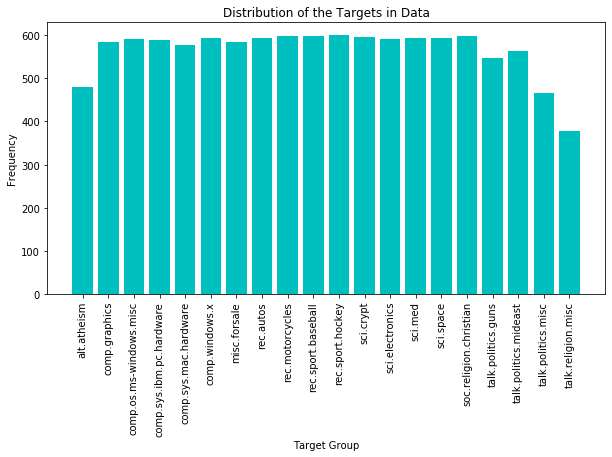

In [0]:
targets, frequency = np.unique(twenty_train.target, return_counts=True)
targets_str = np.array(twenty_train.target_names)
fig=plt.figure(figsize=(10, 5))
plt.bar(targets_str,frequency,color='c')
plt.xticks(rotation=90)
plt.title('Distribution of the Targets in Data')
plt.xlabel('Target Group')
plt.ylabel('Frequency')
plt.show()

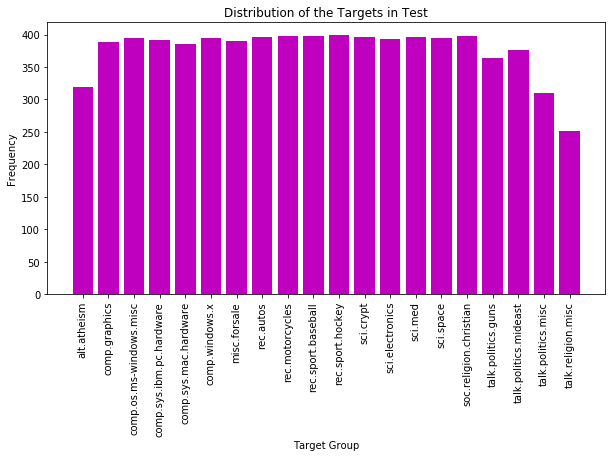

In [0]:
targets, frequency = np.unique(twenty_test.target, return_counts=True)
targets_str = np.array(twenty_test.target_names)
fig=plt.figure(figsize=(10, 5))
plt.bar(targets_str,frequency,color='m')
plt.xticks(rotation=90)
plt.title('Distribution of the Targets in Test')
plt.xlabel('Target Group')
plt.ylabel('Frequency')
plt.show()

## Data cleanup

First convert to a dataframe, then remove all the capital letters and punctuation.

In [0]:
train_df = pd.DataFrame({'data': twenty_train.data, 'target': twenty_train.target})
test_df = pd.DataFrame({'data': twenty_test.data, 'target': twenty_test.target})
import string
import re

#Cleaning the data by removing special characters  
train_df['data'] = train_df.data.map(lambda x: re.sub(r"[^A-Za-z0-9!?\'\`]", " ", x))
test_df['data'] = test_df.data.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()))
#Cleaning the data by uncapetilizing and deleting punctuation 
train_df['data'] = train_df.data.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()))
test_df['data'] = test_df.data.map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()))
train_df.head()

(11314, 2)


,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,do you have weitek s address phone number i...,1
4,from article c5owcb n3p world std com by to...,14


Since we are categorizing by words and there isn't a specific numbers based category, let's remove numbers. Get rid off single letters as well.

In [0]:
#remove numbers / words containing them
train_df['data'] = train_df.data.map(lambda x: re.sub(r"""\w*\d\w*""", ' ', x))
test_df['data'] = test_df.data.map(lambda x: re.sub(r"""\w*\d\w*""", ' ', x))
# Remove single letters
train_df['data'] = train_df.data.map(lambda x: re.sub(r"\b[a-zA-Z]\b","", x))
test_df['data'] = test_df.data.map(lambda x: re.sub(r"\b[a-zA-Z]\b","", x))
train_df.head()

,data,target
0,was wondering if anyone out there could enlig...,7
1,fair number of brave souls who upgraded their...,4
2,well folks my mac plus finally gave up the gh...,4
3,do you have weitek address phone number ...,1
4,from article world std com by tombaker ...,14


Let's make a wordcloud of the most used words to check our data again. On the first run through, the word "ax" was very prominent, so we got rid off that.

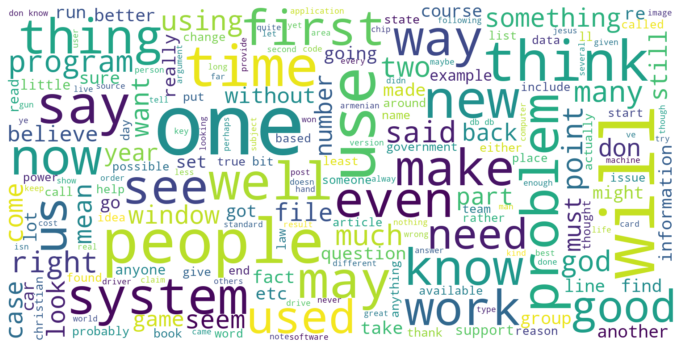

In [0]:
 #remove wrid things we found in intial wordcloud
train_df['data'] = train_df.data.map(lambda x: re.sub("ax","", x))
test_df['data'] = test_df.data.map(lambda x: re.sub("ax","", x))
#Word Cloud

from wordcloud import WordCloud, STOPWORDS
string = []
for t in train_df.data:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')
wordcloud = WordCloud(width=1500, height=750,max_font_size=190,background_color='white').generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Convert from text to vectors

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It is shorter than count vectorizer and tfidfTransformer.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))



(11314, 67753)
<class 'scipy.sparse.csr.csr_matrix'>


# Classifiers
Implement all the classifiers using pipeline


## Logistic Regression

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', LogisticRegression()),
])


text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")

results = pd.DataFrame([("Logistic Regression Default", score)], columns = ['Model' , 'Accuracy']) 

print(classification_report(test_df.target, text_clf.predict(test_df.data)))



The score is:  0.6905204460966543 % 

              precision    recall  f1-score   support

           0       0.48      0.45      0.47       319
           1       0.62      0.69      0.66       389
           2       0.66      0.62      0.64       394
           3       0.66      0.64      0.65       392
           4       0.75      0.68      0.71       385
           5       0.83      0.72      0.77       395
           6       0.75      0.78      0.76       390
           7       0.76      0.71      0.73       396
           8       0.48      0.80      0.60       398
           9       0.80      0.83      0.81       397
          10       0.92      0.87      0.89       399
          11       0.88      0.68      0.77       396
          12       0.57      0.61      0.59       393
          13       0.77      0.80      0.78       396
          14       0.72      0.75      0.73       394
          15       0.64      0.82      0.72       398
          16       0.58      0.69      0.63

### Logistic Regression w/ hyper parameters

Find best penalty using grid search. Only l2 penalty (ridge) was supported for lbfgs solver that we are using (cuz multiclass).

 Let's check which inverse of regularization strength is the best. Experiment with the multi_class as well. If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution.
 
 Also, shorten the dataset (take first 400) for faster processing.

In [0]:
parameters = {
       'clf__C': [1.0, 5.0, 10.0],
       'clf__multi_class':['multinomial','ovr']
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(text_clf, parameters,cv=5,  verbose=1,n_jobs=-1)
grid_search.fit(train_df.data[:400], train_df.target[:400])

grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

print('Best parameters are ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))



Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.7s finished


Best training score 0.4475
Best parameters are 
clf__C: 10.0
clf__multi_class: 'ovr'


In [0]:
text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', LogisticRegression(C=10.0, multi_class='ovr')),
])

text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")
results = results.append(pd.Series(["LR w/ C=10.0 and multi_class='ovr'", score], index=results.columns ), ignore_index=True)

The score is:  0.6964949548592672 % 



## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', DecisionTreeClassifier())
])


text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")

results = results.append(pd.Series(["Decision Tree Default", score], index=results.columns ), ignore_index=True)

print(classification_report(test_df.target, text_clf.predict(test_df.data)))


The score is:  0.4346787041954328 % 

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       319
           1       0.38      0.42      0.40       389
           2       0.44      0.44      0.44       394
           3       0.40      0.37      0.38       392
           4       0.46      0.43      0.45       385
           5       0.47      0.44      0.46       395
           6       0.54      0.54      0.54       390
           7       0.27      0.53      0.35       396
           8       0.57      0.52      0.54       398
           9       0.56      0.51      0.53       397
          10       0.67      0.62      0.64       399
          11       0.56      0.49      0.52       396
          12       0.28      0.26      0.27       393
          13       0.43      0.44      0.44       396
          14       0.48      0.47      0.48       394
          15       0.48      0.50      0.49       398
          16       0.40      0.40      0.40

### Decision Tree hyperparameters

First we will use randomized search to find the best parameters to check with grid search (because randomized search does not check all the combinations). I will also run it twice, as I'm using a subset of the data (all of it takes 10 mins :/).

In [0]:
from sklearn.model_selection import RandomizedSearchCV

criterion=['gini','entropy']
# Number of features to consider at every split
max_features = list(range(1,train_df.shape[1]))
max_features.append(None)
# Maximum number of levels in tree
max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_splits = np.linspace(0.1, 1.0, 20, endpoint=True)
# Minimum number of samples required at each leaf node
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

# Create the random grid
random_grid = {'clf__criterion': criterion,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
               }


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator = text_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


random.fit(train_df.data[:400], train_df.target[:400]) #fast!!!!
print(random.best_params_)
#random.fit(train_df.data, train_df.target)   #slow, expect 10 mins at least
#print(random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.5min finished


{'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': None, 'clf__criterion': 'gini'}


Plug in our randomized search results into the grid search. It seems like we only need to one parameter, the rest are default.
To save time: result of running previious code segment with full sized data set is `'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': None, 'clf__criterion': 'gini'`


In [0]:
parameters = {
       'clf__min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100],     
}


grid_search = GridSearchCV(text_clf, parameters,cv=5,  verbose=1,n_jobs=-1)
#grid_search.fit(train_df.data[:400], train_df.target[:400])
grid_search.fit(train_df.data, train_df.target)

grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

print('Best parameters are ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.4min finished


Best training score 0.4867
Best parameters are 
clf__min_samples_split: 100


Best split was 100, so we plug that in

In [0]:
text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', DecisionTreeClassifier(min_samples_split=100)),
])

text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")
results = results.append(pd.Series(["D Tree w/ min_samples_split=100", score], index=results.columns ), ignore_index=True)

The score is:  0.44954859267126923 % 



## Support Vector Machine

In [0]:
from sklearn.svm import LinearSVC

text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', LinearSVC())
])


text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")

results = results.append(pd.Series(["SVM Default", score], index=results.columns ), ignore_index=True)

print(classification_report(test_df.target, text_clf.predict(test_df.data)))

The score is:  0.6919808815719597 % 

              precision    recall  f1-score   support

           0       0.53      0.48      0.50       319
           1       0.65      0.70      0.67       389
           2       0.61      0.62      0.62       394
           3       0.62      0.65      0.64       392
           4       0.74      0.69      0.71       385
           5       0.82      0.71      0.76       395
           6       0.76      0.78      0.77       390
           7       0.75      0.71      0.73       396
           8       0.79      0.74      0.76       398
           9       0.55      0.86      0.67       397
          10       0.88      0.87      0.87       399
          11       0.84      0.72      0.78       396
          12       0.62      0.56      0.59       393
          13       0.78      0.78      0.78       396
          14       0.75      0.75      0.75       394
          15       0.63      0.79      0.70       398
          16       0.60      0.67      0.63

### SVM w/ hyperparameter tuning

Only grid for this one


In [0]:
parameters = {
       'clf__C' : [0.001, 0.01, 0.1, 1, 10]
    
}


grid_search = GridSearchCV(text_clf, parameters,cv=5,  verbose=1,n_jobs=-1)
#grid_search.fit(train_df.data[:400], train_df.target[:400])
grid_search.fit(train_df.data, train_df.target)

grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

print('Best parameters are ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished


Best training score 0.7598
Best parameters are 
clf__C: 1


The default C value was already the best, so we do not need to do anything else.

## Ada Boost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', AdaBoostClassifier())
])


text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")

results = results.append(pd.Series(["Ada Boost Default", score], index=results.columns ), ignore_index=True)

print(classification_report(test_df.target, text_clf.predict(test_df.data)))

The score is:  0.36510886882634097 % 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.61      0.23      0.34       389
           2       0.63      0.39      0.48       394
           3       0.47      0.32      0.38       392
           4       0.68      0.38      0.48       385
           5       0.69      0.40      0.51       395
           6       0.76      0.51      0.61       390
           7       0.79      0.38      0.51       396
           8       0.92      0.33      0.48       398
           9       0.76      0.19      0.30       397
          10       0.64      0.58      0.61       399
          11       0.80      0.42      0.55       396
          12       0.08      0.82      0.15       393
          13       0.86      0.21      0.34       396
          14       0.73      0.34      0.46       394
          15       0.52      0.64      0.57       398
          16       0.48      0.24      0.3

### Adaboost w/ hyperparameter tuning

In [0]:
random_grid = {
 'clf__n_estimators': [50, 100],
 'clf__learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
 # Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator = text_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


random.fit(train_df.data, train_df.target)
print(random.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


{'clf__n_estimators': 100, 'clf__learning_rate': 1}


Results are `clf__n_estimators': 100, 'clf__learning_rate': 1`. Learning rate is as default, which was the parameter I was most curious about.

In [0]:
text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', AdaBoostClassifier(n_estimators=100)),
])

text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")
results = results.append(pd.Series(["Ada Boost w/ 100 estimators", score], index=results.columns ), ignore_index=True)

The score is:  0.4232607541157727 % 



## Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', RandomForestClassifier())
])


text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")

results = results.append(pd.Series(["Random Forest Default", score], index=results.columns ), ignore_index=True)

print(classification_report(test_df.target, text_clf.predict(test_df.data)))

The score is:  0.61311736590547 % 

              precision    recall  f1-score   support

           0       0.44      0.39      0.41       319
           1       0.55      0.58      0.56       389
           2       0.52      0.63      0.57       394
           3       0.59      0.54      0.57       392
           4       0.66      0.63      0.64       385
           5       0.65      0.65      0.65       395
           6       0.68      0.74      0.71       390
           7       0.42      0.70      0.53       396
           8       0.68      0.68      0.68       398
           9       0.69      0.76      0.72       397
          10       0.81      0.80      0.81       399
          11       0.78      0.66      0.71       396
          12       0.52      0.45      0.48       393
          13       0.71      0.62      0.66       396
          14       0.72      0.65      0.68       394
          15       0.58      0.79      0.67       398
          16       0.52      0.59      0.55  

### Random Forest w/ hyperparameters

Warning: finding the best parameters takes over an hour, so just run the last code bit only


In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'clf__n_estimators': n_estimators,
               'clf__max_features': max_features,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf,
           }

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator = text_clf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


#random.fit(train_df.data[:400], train_df.target[:400]) #fast!!!!
#print(random.best_params_)
random.fit(train_df.data, train_df.target)   #slow, expect 10 mins at least
print(random.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.5min finished


{'clf__n_estimators': 1800, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'auto', 'clf__max_depth': 100}


Looks like most we will be fine tuning three features. The results from above were `'clf__n_estimators': 1800, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_features': 'auto', 'clf__max_depth': 100`

In [0]:
parameters = {
       'clf__n_estimators': [1000, 1500, 2000],
               'clf__max_depth': ['none', 60, 100, 150 ],
               'clf__min_samples_split': [2, 5, 10],  
}


grid_search = GridSearchCV(text_clf, parameters,cv=2,  verbose=1,n_jobs=-1)
#grid_search.fit(train_df.data[:400], train_df.target[:400])
grid_search.fit(train_df.data, train_df.target)

grid_search.cv_results_
print('Best training score %0.4f' % grid_search.best_score_)

print('Best parameters are ')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 60.5min finished


Best training score 0.6559
Best parameters are 
clf__max_depth: 150
clf__min_samples_split: 5
clf__n_estimators: 2000


Best parameters were `clf__max_depth: 150,
clf__min_samples_split: 5,
clf__n_estimators: 2000`

In [0]:
text_clf = Pipeline([
   ('tfidf', TfidfVectorizer(stop_words='english', sublinear_tf=True)),
   ('clf', RandomForestClassifier(max_depth =150, min_samples_split=5, n_estimators= 2000)),
])

text_clf.fit(train_df.data, train_df.target)
score=text_clf.score(test_df.data, test_df.target)
print ("The score is: ", score, "% \n")
results = results.append(pd.Series(["Random Forest w/ max_depth: 150, min_samples_split: 5, n_estimators: 2000", score], index=results.columns ), ignore_index=True)

The score is:  0.6328996282527881 % 



# Results

In [0]:
from IPython.display import display, HTML
display(HTML(results.to_html()))
print("\n Best model is: ")
print(results[results.Accuracy == results.Accuracy.max()]) 

,Model,Accuracy
0,Logistic Regression Default,0.690520
1,LR w/ C=10.0 and multi_class='ovr',0.696495
2,Decision Tree Default,0.434679
3,D Tree w/ min_samples_split=100,0.449549
4,SVM Default,0.691981
5,Ada Boost Default,0.365109
6,Ada Boost w/ 100 estimators,0.423261
7,Random Forest Default,0.613117
8,"Random Forest w/ max_depth: 150, min_samples_split: 5, n_estimators: 2000",0.632900



 Best model is: 
                                Model  Accuracy
1  LR w/ C=10.0 and multi_class='ovr'  0.696495


The results were
0.	Logistic Regression Default:   	*0.690520*
1.	LR w/ C=10.0 and multi_class='ovr'    *0.696495*
2.	Decision Tree Default  *0.434679*
3.	D Tree w/ min_samples_split=100	*0.449549*
4.	SVM Default	*0.691981*
5.	Ada Boost Default	*0.365109*
6.	Ada Boost w/ 100 estimators	*0.423261*
7.	Random Forest Default	*0.613117*
8.	Random Forest w/ max_depth: 150, min_samples_split: 5, n_estimators: 2000	*0.632900*

 **Best model is:** 
                                
*1  LR w/ C=10.0 and multi_class='ovr'  0.696495* 

References:
- https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
- https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
- https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
